# 传统特征提取详解（第一部分）

## 📋 文档说明

本文档是传统特征提取的详细理论讲解，比父目录的《图像特征提取详解》更加深入和详细。本文档将深入讲解SIFT、HOG、LBP等传统特征提取方法的原理、数学推导和实现细节。通过本文档，你将能够：

1. **深入理解传统特征提取的原理**：从数学基础到实现细节，全面掌握传统特征提取方法
2. **掌握SIFT特征的完整流程**：包括尺度空间构建、关键点检测、特征描述等所有步骤的详细数学推导
3. **掌握HOG特征的完整流程**：包括梯度计算、方向直方图统计、块归一化等所有步骤的详细数学推导
4. **理解其他传统特征提取方法**：LBP、ORB、SURF等方法的工作原理和应用
5. **了解传统特征提取在VLA中的意义**：虽然现代VLA不直接使用，但理解传统方法有助于理解深度学习方法的设计思想

**学习方式**：本文件是Jupyter Notebook格式，你可以边看边运行代码，通过可视化图表和数学推导更好地理解传统特征提取的原理和过程。

**文档结构**：由于内容较多，本文档分为多个部分：
- **第一部分（本文档）**：SIFT特征提取的详细讲解
- **第二部分**：HOG特征提取的详细讲解
- **第三部分**：其他传统特征提取方法（LBP、ORB、SURF等）

---

## 📚 术语表（按出现顺序）

### 1. 传统特征提取 (Traditional Feature Extraction)
- **中文名称**：传统特征提取
- **英文全称**：Traditional Feature Extraction
- **定义**：传统特征提取是指基于手工设计的特征提取方法，这些方法不依赖于深度学习，而是基于图像处理、信号处理、数学分析等传统技术。传统特征提取方法包括SIFT（尺度不变特征变换）、HOG（方向梯度直方图）、LBP（局部二值模式）、ORB（Oriented FAST and Rotated BRIEF）、SURF（Speeded Up Robust Features）等。这些方法在深度学习兴起之前是计算机视觉的主流方法，虽然现在深度学习方法的性能更好，但理解传统特征提取方法有助于理解特征提取的基本原理，也有助于理解深度学习方法的设计思想。传统特征提取方法通常具有可解释性强、不需要大量训练数据、计算效率高等优点，但也存在表达能力有限、需要人工设计、难以适应新任务等缺点。
- **核心组成**：传统特征提取的核心组成包括：1）特征检测：检测图像中的关键点、边缘、区域等特征位置，通常基于数学分析（如角点检测、边缘检测、尺度空间分析等）；2）特征描述：为检测到的特征位置生成描述符，用数值向量表示特征，通常基于统计方法（如梯度统计、纹理统计、颜色统计等）；3）特征编码：将特征编码为固定长度的向量，便于存储和计算；4）特征归一化：对特征进行归一化处理，消除尺度、光照等因素的影响；5）不变性设计：通过数学方法实现旋转不变性、尺度不变性、光照不变性等，提高特征的鲁棒性；6）特征匹配：使用特征描述符进行特征匹配，用于图像配准、目标识别等任务。
- **在VLA中的应用**：在VLA中，传统特征提取方法虽然不直接使用，但理解传统特征提取的原理有助于理解特征提取的基本思想。传统特征提取的多尺度分析、方向分配、特征描述等思想在深度学习方法中也有体现，例如CNN的多尺度特征、ViT的位置编码等。理解传统特征提取有助于理解VLA模型如何从图像中提取特征，如何实现尺度不变性、旋转不变性等。在某些VLA应用中，传统特征提取仍然有用，例如用于图像配准、特征匹配等辅助任务。此外，传统特征提取的可解释性有助于理解VLA模型的决策过程，这对于模型调试和优化非常重要。
- **相关概念**：SIFT特征、HOG特征、LBP特征、关键点检测、特征描述符、尺度空间、图像处理
- **首次出现位置**：本文档标题
- **深入学习**：参考父目录的[图像特征提取详解](../图像特征提取详解.ipynb)
- **直观理解**：想象传统特征提取就像用传统的工具（如尺子、量角器、放大镜）来分析图像，这些工具是手工设计的，不需要学习，但需要人工选择合适的工具和方法。传统特征提取就是这样的过程，它使用手工设计的数学方法（如梯度计算、直方图统计等）从图像中提取特征，这些方法基于数学理论和图像处理技术，不需要训练，但需要人工设计。虽然现代深度学习方法更强大，但理解传统方法有助于理解特征提取的基本原理，就像理解传统工具的工作原理有助于理解现代工具的设计思想一样。

### 2. SIFT特征 (SIFT Features)
- **中文名称**：SIFT特征
- **英文全称**：Scale-Invariant Feature Transform Features
- **定义**：SIFT（尺度不变特征变换）是一种经典的特征提取和描述方法，由David Lowe在2004年提出。SIFT特征具有尺度不变性、旋转不变性、光照不变性等优点，是计算机视觉领域最经典的特征提取方法之一，被广泛应用于图像匹配、目标识别、图像检索等任务。SIFT特征提取包括两个主要步骤：1）关键点检测：在不同尺度下检测图像中的关键点，使用高斯差分金字塔（DoG）检测尺度空间极值点，然后通过精确定位、边缘响应去除、方向分配等步骤得到稳定的关键点；2）特征描述：为每个关键点生成128维的特征描述符，描述关键点周围的梯度信息，通过方向直方图统计和归一化处理，得到具有旋转不变性的特征描述符。SIFT特征在图像匹配、目标识别、图像检索等任务中取得了很好的效果，虽然现在深度学习方法的性能更好，但SIFT特征仍然是理解特征提取原理的重要参考，也是许多计算机视觉系统的基础组件。
- **核心组成**：SIFT特征的核心组成包括：1）尺度空间构建：构建图像的高斯金字塔和DoG金字塔，在不同尺度下分析图像，实现尺度不变性；2）关键点检测：在DoG金字塔中检测局部极值点，作为关键点候选，通过3D非极大值抑制找到稳定的关键点；3）关键点精确定位：使用泰勒展开精确定位关键点位置，去除低对比度和边缘响应点，提高关键点的稳定性；4）方向分配：为每个关键点分配主方向，通过统计关键点周围区域的梯度方向直方图，找到主方向，实现旋转不变性；5）特征描述符生成：在关键点周围提取梯度信息，将16x16的邻域划分为4x4的子区域，在每个子区域中统计8个方向的梯度直方图，得到4x4x8=128维的特征描述符；6）特征归一化：对特征描述符进行归一化，消除光照变化的影响，提高鲁棒性。
- **在VLA中的应用**：在VLA中，SIFT特征虽然不直接使用，但理解SIFT特征的原理有助于理解特征提取的基本思想。SIFT特征的多尺度分析、方向分配、特征描述等思想在深度学习方法中也有体现，例如CNN的多尺度特征提取、ViT的位置编码等。理解SIFT特征有助于理解VLA模型如何从图像中提取特征，如何实现尺度不变性、旋转不变性等。在某些VLA应用中，SIFT特征仍然有用，例如用于图像配准、特征匹配等辅助任务。此外，SIFT特征的数学原理（如尺度空间理论、梯度统计等）有助于理解深度学习方法的设计思想，例如理解为什么CNN需要多层网络、为什么需要池化操作等。
- **相关概念**：关键点检测、特征描述符、尺度空间、高斯金字塔、DoG金字塔、梯度计算、方向直方图
- **首次出现位置**：本文档第1节
- **深入学习**：参考本文档的SIFT特征详细讲解部分
- **直观理解**：想象SIFT特征就像给图像中的每个关键点制作一张详细的"身份证"，这张身份证不仅记录了关键点的位置，还记录了关键点周围的环境信息，如梯度方向、纹理特征等。这张"身份证"具有很好的不变性，即使图像旋转、缩放、光照变化，我们仍然能够识别和匹配这些关键点。SIFT特征就是这样的特征，它通过多尺度分析找到稳定的关键点，通过方向分配实现旋转不变性，通过梯度统计生成特征描述符，能够稳定地描述图像中的关键点，用于图像匹配、目标识别等任务。

### 3. 尺度空间 (Scale Space)
- **中文名称**：尺度空间
- **英文全称**：Scale Space
- **定义**：尺度空间是指在不同尺度（分辨率）下表示图像的空间，是图像处理和多尺度分析的基础理论。在尺度空间中，图像被不同尺度的高斯核卷积，形成多尺度的图像表示，每个尺度对应一个不同的分辨率或模糊程度。尺度空间理论由Witkin在1983年提出，是计算机视觉中处理多尺度问题的基础。尺度空间的主要思想是：图像中的特征可能出现在不同的尺度下，例如远处的物体看起来小（小尺度），近处的物体看起来大（大尺度），为了检测不同尺度的特征，我们需要在多个尺度下分析图像。尺度空间通过高斯卷积实现，高斯核的大小（标准差）决定了尺度的大小，大尺度对应大的高斯核（图像更模糊），小尺度对应小的高斯核（图像更清晰）。尺度空间理论在SIFT、SURF等特征提取方法中广泛应用，也是理解深度学习中多尺度特征提取的基础。
- **核心组成**：尺度空间的核心组成包括：1）高斯核函数：用于构建尺度空间的高斯核函数，其大小（标准差）决定了尺度的大小；2）尺度参数：控制尺度大小的参数，通常用σ（标准差）表示，σ越大，尺度越大，图像越模糊；3）尺度空间表示：在不同尺度下表示的图像，通常用L(x, y, σ)表示，其中(x, y)是空间坐标，σ是尺度参数；4）尺度空间极值：在尺度空间中检测到的极值点，这些点对应图像中的关键特征；5）尺度不变性：通过多尺度分析实现的特征不变性，使特征能够适应不同尺度的图像；6）尺度选择：选择合适的尺度范围和分析方法，以检测不同尺度的特征。
- **在VLA中的应用**：在VLA中，尺度空间理论虽然不直接使用，但理解尺度空间有助于理解多尺度特征提取的原理。VLA模型需要处理不同尺度的视觉信息，例如远处的物体和近处的物体，理解尺度空间理论有助于理解VLA模型如何从不同尺度提取特征。在深度学习中，CNN的多层网络可以看作是在不同尺度下提取特征，浅层网络提取小尺度特征（如边缘、纹理），深层网络提取大尺度特征（如物体、场景），这与尺度空间理论的思想一致。理解尺度空间理论有助于理解为什么CNN需要多层网络、为什么需要池化操作等，这对于理解VLA模型的视觉编码器非常重要。
- **相关概念**：高斯卷积、多尺度分析、尺度不变性、高斯金字塔、DoG金字塔、关键点检测
- **首次出现位置**：本文档第2.1节
- **深入学习**：参考本文档的尺度空间详细讲解部分
- **直观理解**：想象尺度空间就像用不同大小的"放大镜"观察图像，每个"放大镜"对应一个尺度。用大"放大镜"（大尺度）观察，我们能看到图像的整体结构，但细节模糊；用小"放大镜"（小尺度）观察，我们能看到图像的细节，但整体结构不清楚。通过在不同尺度下观察图像，我们就能检测到不同大小的特征，例如大尺度下的物体轮廓、小尺度下的纹理细节。尺度空间就是这样的理论，它通过高斯卷积在不同尺度下表示图像，使我们能够在不同尺度下分析图像，检测不同尺度的特征。

### 4. 高斯金字塔 (Gaussian Pyramid)
- **中文名称**：高斯金字塔
- **英文全称**：Gaussian Pyramid
- **定义**：高斯金字塔是指通过高斯卷积和下采样构建的多尺度图像表示，是尺度空间理论的一种离散实现。高斯金字塔由多个层级（octave）组成，每个层级包含多个尺度（scale），每个尺度对应一个不同大小的高斯核卷积后的图像。高斯金字塔的构建过程包括：1）对原始图像进行高斯卷积，得到不同尺度的图像；2）对每个尺度的图像进行下采样（通常是2倍下采样），得到下一层级的图像；3）重复上述过程，构建多个层级的金字塔。高斯金字塔在SIFT、SURF等特征提取方法中广泛应用，用于在不同尺度下检测关键点。高斯金字塔的优势在于：1）计算效率高：通过下采样减少计算量；2）多尺度表示：能够表示不同尺度的图像；3）尺度连续性：通过多个尺度和层级，实现尺度的连续表示。高斯金字塔是理解多尺度特征提取的基础，也是理解深度学习中多尺度特征的基础。
- **核心组成**：高斯金字塔的核心组成包括：1）层级（Octave）：金字塔的不同层级，每个层级对应一个不同的分辨率，通常通过2倍下采样得到；2）尺度（Scale）：每个层级内的不同尺度，通过不同大小的高斯核卷积得到；3）高斯卷积：使用高斯核对图像进行卷积，得到不同尺度的图像；4）下采样：对图像进行降采样，通常是2倍下采样，减少图像大小和计算量；5）尺度参数：控制高斯核大小的参数，通常用σ表示，σ越大，图像越模糊；6）尺度间隔：相邻尺度之间的间隔，通常用k表示，k=2^(1/s)，其中s是每个层级的尺度数。高斯金字塔的构建需要选择合适的层级数、尺度数和尺度间隔，以平衡计算效率和特征检测的准确性。
- **在VLA中的应用**：在VLA中，高斯金字塔虽然不直接使用，但理解高斯金字塔有助于理解多尺度特征提取的原理。VLA模型需要处理不同尺度的视觉信息，理解高斯金字塔有助于理解VLA模型如何从不同尺度提取特征。在深度学习中，CNN的多层网络可以看作是在不同尺度下提取特征，这与高斯金字塔的思想一致。理解高斯金字塔有助于理解为什么CNN需要多层网络、为什么需要池化操作等，这对于理解VLA模型的视觉编码器非常重要。此外，高斯金字塔的下采样思想在CNN的池化操作中也有体现，理解高斯金字塔有助于理解池化操作的作用和原理。
- **相关概念**：尺度空间、DoG金字塔、下采样、高斯卷积、多尺度分析、关键点检测
- **首次出现位置**：本文档第2.2节
- **深入学习**：参考本文档的高斯金字塔详细讲解部分
- **直观理解**：想象高斯金字塔就像用不同大小的"放大镜"观察图像，然后将观察结果按照大小和清晰度排列成金字塔形状。金字塔的底层是原始图像（小尺度、高分辨率），顶层是高度模糊的图像（大尺度、低分辨率），中间层是不同尺度和分辨率的图像。通过这个金字塔，我们就能在不同尺度下分析图像，检测不同大小的特征。高斯金字塔就是这样的结构，它通过高斯卷积和下采样构建多尺度的图像表示，使我们能够在不同尺度下检测关键点，实现尺度不变性。

### 5. DoG金字塔 (Difference of Gaussians Pyramid)
- **中文名称**：DoG金字塔
- **英文全称**：Difference of Gaussians Pyramid
- **定义**：DoG（高斯差分）金字塔是指通过计算相邻尺度的高斯图像之差构建的金字塔，是SIFT特征提取中用于检测关键点的方法。DoG金字塔通过计算相邻尺度的高斯图像之差来近似拉普拉斯算子（Laplacian of Gaussian, LoG），而LoG的极值点对应图像中的关键点（如角点、边缘点等）。DoG金字塔的构建过程包括：1）构建高斯金字塔，得到不同尺度的图像；2）计算相邻尺度的高斯图像之差，得到DoG图像；3）将所有DoG图像组织成DoG金字塔。DoG金字塔的优势在于：1）计算效率高：DoG比直接计算LoG更高效；2）关键点检测：DoG的极值点对应图像中的关键点；3）尺度不变性：通过多尺度分析实现尺度不变性。DoG金字塔是SIFT特征提取的核心，用于在不同尺度下检测关键点，是理解SIFT特征提取的关键。
- **核心组成**：DoG金字塔的核心组成包括：1）高斯金字塔：DoG金字塔的基础，提供不同尺度的图像；2）DoG计算：计算相邻尺度的高斯图像之差，得到DoG图像；3）极值点检测：在DoG金字塔中检测局部极值点，这些点对应图像中的关键点；4）3D非极大值抑制：在空间和尺度两个维度上进行非极大值抑制，找到稳定的关键点；5）尺度参数：控制DoG计算的尺度参数，通常用σ和kσ表示，其中k是尺度因子；6）关键点候选：DoG金字塔中的极值点作为关键点候选，需要进一步精确定位和筛选。DoG金字塔的构建需要选择合适的尺度间隔和层级数，以平衡关键点检测的准确性和计算效率。
- **在VLA中的应用**：在VLA中，DoG金字塔虽然不直接使用，但理解DoG金字塔有助于理解关键点检测的原理。VLA模型需要从图像中提取关键特征，理解DoG金字塔有助于理解VLA模型如何检测图像中的关键区域。在深度学习中，CNN的卷积层可以看作是在检测关键特征，这与DoG金字塔的思想有相似之处。理解DoG金字塔有助于理解为什么CNN需要多层网络、为什么需要不同的卷积核等，这对于理解VLA模型的视觉编码器非常重要。此外，DoG金字塔的极值点检测思想在深度学习的特征检测中也有体现，理解DoG金字塔有助于理解深度学习中的特征检测机制。
- **相关概念**：高斯金字塔、拉普拉斯算子、关键点检测、尺度空间、极值点检测、SIFT特征
- **首次出现位置**：本文档第2.3节
- **深入学习**：参考本文档的DoG金字塔详细讲解部分
- **直观理解**：想象DoG金字塔就像用两个不同大小的"放大镜"观察图像，然后计算两个观察结果的差异。这个差异能够突出图像中的关键特征，例如角点、边缘点等。DoG金字塔就是这样的方法，它通过计算相邻尺度的高斯图像之差来检测关键点，就像用两个不同大小的"放大镜"观察图像，找出两个观察结果之间的差异，这些差异对应图像中的关键特征。通过在不同尺度下计算DoG，我们就能检测到不同尺度的关键点，实现尺度不变性。

### 6. 关键点精确定位 (Keypoint Refinement)
- **中文名称**：关键点精确定位
- **英文全称**：Keypoint Refinement
- **定义**：关键点精确定位是指对DoG检测到的关键点候选进行精确定位和筛选的过程，是SIFT特征提取中的重要步骤。DoG检测到的关键点位置可能不够精确，可能位于像素之间（亚像素位置），也可能对应低对比度或边缘响应，这些关键点不够稳定，需要进一步精确定位和筛选。关键点精确定位包括：1）亚像素定位：使用泰勒展开对DoG函数进行拟合，找到极值点的精确位置（亚像素精度）；2）低对比度去除：去除对比度低的关键点，这些点对噪声敏感，不够稳定；3）边缘响应去除：去除位于边缘上的关键点，这些点的主曲率比很大，不够稳定；4）关键点筛选：根据关键点的质量、稳定性等指标筛选关键点，保留最稳定的关键点。关键点精确定位能够提高关键点的稳定性和准确性，是SIFT特征提取的关键步骤。
- **核心组成**：关键点精确定位的核心组成包括：1）泰勒展开：使用泰勒展开对DoG函数进行拟合，找到极值点的精确位置；2）亚像素定位：通过拟合找到亚像素精度的关键点位置，提高定位精度；3）对比度阈值：设置对比度阈值，去除低对比度的关键点；4）边缘响应检测：通过计算Hessian矩阵的特征值，检测边缘响应；5）主曲率比：计算关键点的主曲率比，用于判断是否为边缘响应；6）关键点筛选：根据关键点的质量指标筛选关键点，保留最稳定的关键点。关键点精确定位需要选择合适的阈值和筛选标准，以平衡关键点的数量和稳定性。
- **在VLA中的应用**：在VLA中，关键点精确定位虽然不直接使用，但理解关键点精确定位有助于理解特征检测的原理。VLA模型需要从图像中提取稳定的特征，理解关键点精确定位有助于理解VLA模型如何提高特征的稳定性。在深度学习中，特征检测和筛选的思想在CNN的训练和优化中也有体现，例如通过正则化、dropout等方法提高特征的稳定性。理解关键点精确定位有助于理解为什么需要特征筛选、如何提高特征的稳定性等，这对于理解VLA模型的训练和优化非常重要。
- **相关概念**：关键点检测、DoG金字塔、泰勒展开、亚像素定位、边缘检测、Hessian矩阵
- **首次出现位置**：本文档第2.4节
- **深入学习**：参考本文档的关键点精确定位详细讲解部分
- **直观理解**：想象关键点精确定位就像用更精确的工具（如显微镜）来精确定位和筛选关键点。DoG检测到的关键点就像用普通放大镜找到的粗略位置，关键点精确定位就像用显微镜精确找到关键点的位置，并去除那些不够稳定的关键点。关键点精确定位就是这样的过程，它通过数学方法（如泰勒展开）精确定位关键点的位置，并通过筛选去除不稳定的关键点，只保留最稳定的关键点，提高特征检测的准确性和稳定性。

### 7. 方向分配 (Orientation Assignment)
- **中文名称**：方向分配
- **英文全称**：Orientation Assignment
- **定义**：方向分配是指为每个关键点分配主方向的过程，是SIFT特征提取中实现旋转不变性的关键步骤。为了实现旋转不变性，我们需要为每个关键点分配一个主方向，然后相对于这个主方向提取特征描述符，这样即使图像旋转，特征描述符也不会改变。方向分配的过程包括：1）梯度计算：在关键点周围的邻域中，计算每个像素的梯度幅值和方向；2）方向直方图统计：统计梯度方向的直方图，通常将方向分为36个区间（每10度一个区间）；3）主方向确定：找到直方图的峰值方向，作为关键点的主方向；4）辅助方向处理：如果存在多个峰值（通常要求峰值至少是主峰值的80%），则为关键点分配多个方向，生成多个关键点描述符。方向分配能够实现旋转不变性，使SIFT特征对图像旋转具有鲁棒性，是SIFT特征提取的重要步骤。
- **核心组成**：方向分配的核心组成包括：1）梯度计算：在关键点周围的邻域中计算梯度，通常使用3σ邻域，其中σ是关键点的尺度；2）方向直方图：统计梯度方向的直方图，通常将方向分为36个区间，每个区间10度；3）高斯加权：使用高斯函数对梯度幅值进行加权，距离关键点越近的像素权重越大；4）主方向确定：找到直方图的峰值方向，作为关键点的主方向；5）辅助方向：如果存在多个峰值，为关键点分配多个方向；6）方向平滑：对方向直方图进行平滑处理，提高主方向检测的稳定性。方向分配需要选择合适的邻域大小、方向区间数和峰值阈值，以平衡旋转不变性和计算效率。
- **在VLA中的应用**：在VLA中，方向分配虽然不直接使用，但理解方向分配有助于理解旋转不变性的实现原理。VLA模型需要处理不同方向的视觉信息，理解方向分配有助于理解VLA模型如何实现旋转不变性。在深度学习中，数据增强（如旋转增强）可以看作是在训练过程中学习旋转不变性，这与方向分配的思想有相似之处。理解方向分配有助于理解为什么需要数据增强、如何提高模型的旋转不变性等，这对于理解VLA模型的训练和优化非常重要。此外，方向分配的主方向思想在深度学习的注意力机制中也有体现，理解方向分配有助于理解注意力机制如何关注重要的方向信息。
- **相关概念**：关键点检测、梯度计算、方向直方图、旋转不变性、特征描述符、SIFT特征
- **首次出现位置**：本文档第2.5节
- **深入学习**：参考本文档的方向分配详细讲解部分
- **直观理解**：想象方向分配就像为每个关键点确定一个"正北方向"，然后相对于这个"正北方向"描述关键点的特征。即使图像旋转，只要我们知道关键点的"正北方向"，我们就能正确地描述关键点的特征。方向分配就是这样的过程，它通过统计关键点周围区域的梯度方向，找到主方向（就像找到"正北方向"），然后相对于这个主方向提取特征描述符，实现旋转不变性。这样，即使图像旋转，特征描述符也不会改变，使SIFT特征对图像旋转具有鲁棒性。

### 8. SIFT描述符 (SIFT Descriptor)
- **中文名称**：SIFT描述符
- **英文全称**：SIFT Descriptor
- **定义**：SIFT描述符是指为每个关键点生成的128维特征向量，用于描述关键点周围的梯度信息，是SIFT特征提取的最终输出。SIFT描述符的生成过程包括：1）邻域划分：在关键点周围取16x16的邻域，相对于关键点的主方向进行旋转，实现旋转不变性；2）子区域划分：将16x16的邻域划分为4x4的子区域，共16个子区域；3）方向直方图统计：在每个子区域中统计8个方向的梯度直方图，共4x4x8=128维；4）特征归一化：对128维的特征向量进行归一化，消除光照变化的影响；5）特征截断：对归一化后的特征进行截断（通常截断到0.2），然后重新归一化，提高鲁棒性。SIFT描述符具有旋转不变性、尺度不变性、光照不变性等优点，能够稳定地描述图像中的关键点，是SIFT特征提取的核心输出，广泛应用于图像匹配、目标识别等任务。
- **核心组成**：SIFT描述符的核心组成包括：1）邻域选择：在关键点周围选择16x16的邻域，相对于主方向进行旋转；2）子区域划分：将16x16的邻域划分为4x4的子区域，每个子区域4x4像素；3）方向直方图：在每个子区域中统计8个方向的梯度直方图，每个方向45度；4）高斯加权：使用高斯函数对梯度幅值进行加权，距离关键点越近的像素权重越大；5）特征向量：将所有子区域的方向直方图连接成128维的特征向量；6）特征归一化：对特征向量进行L2归一化，然后截断和重新归一化，提高鲁棒性。SIFT描述符的生成需要选择合适的邻域大小、子区域数、方向数等参数，以平衡特征的区分性和计算效率。
- **在VLA中的应用**：在VLA中，SIFT描述符虽然不直接使用，但理解SIFT描述符有助于理解特征描述的原理。VLA模型需要将图像转换为数值特征，理解SIFT描述符有助于理解VLA模型如何生成特征向量。在深度学习中，CNN的特征图可以看作是一种特征描述符，理解SIFT描述符有助于理解CNN如何生成特征。理解SIFT描述符有助于理解为什么需要特征归一化、如何提高特征的鲁棒性等，这对于理解VLA模型的训练和优化非常重要。此外，SIFT描述符的局部特征描述思想在深度学习的局部特征提取中也有体现，理解SIFT描述符有助于理解深度学习的局部特征提取机制。
- **相关概念**：关键点检测、方向分配、梯度计算、方向直方图、特征归一化、特征描述符
- **首次出现位置**：本文档第2.6节
- **深入学习**：参考本文档的SIFT描述符详细讲解部分
- **直观理解**：想象SIFT描述符就像为每个关键点制作一张详细的"身份证"，这张身份证用128个数字编码了关键点周围的特征信息，如梯度方向、纹理特征等。这张"身份证"具有很好的不变性，即使图像旋转、缩放、光照变化，我们仍然能够识别和匹配这些关键点。SIFT描述符就是这样的特征向量，它通过统计关键点周围区域的梯度方向直方图，生成128维的特征向量，能够稳定地描述图像中的关键点，用于图像匹配、目标识别等任务。

---

## 📋 概述

### 什么是传统特征提取

传统特征提取是指基于手工设计的特征提取方法，这些方法不依赖于深度学习，而是基于图像处理、信号处理、数学分析等传统技术。传统特征提取方法包括SIFT、HOG、LBP、ORB、SURF等，这些方法在深度学习兴起之前是计算机视觉的主流方法。

### 为什么重要

虽然现代VLA模型通常使用深度学习方法，但理解传统特征提取方法仍然非常重要，原因包括：

1. **理解基本原理**：传统特征提取方法基于数学理论和图像处理技术，理解这些方法有助于理解特征提取的基本原理
2. **理解深度学习设计思想**：深度学习方法的设计思想（如多尺度特征、局部特征描述等）与传统方法有相似之处，理解传统方法有助于理解深度学习方法
3. **可解释性**：传统方法具有可解释性，有助于理解VLA模型的决策过程
4. **辅助任务**：在某些VLA应用中，传统方法仍然有用，例如用于图像配准、特征匹配等辅助任务

### 在VLA体系中的位置

传统特征提取是VLA学习体系的基础阶段（01_视觉理解基础/01_图像特征提取）的第一个子模块，它位于：

1. **图像特征提取之后**：是图像特征提取的详细展开
2. **CNN特征提取之前**：为理解CNN特征提取提供基础
3. **Vision Transformer之前**：为理解ViT特征提取提供基础

### 学习目标

通过本文档的学习，你将能够：

1. **深入理解SIFT特征**：从数学基础到实现细节，全面掌握SIFT特征提取方法
2. **理解尺度空间理论**：理解多尺度分析的基本原理和数学基础
3. **掌握关键点检测**：理解关键点检测的原理和方法
4. **理解特征描述**：理解如何生成稳定、具有不变性的特征描述符
5. **了解其他传统方法**：了解HOG、LBP、ORB等其他传统特征提取方法

---

## 1. SIFT特征提取详解

SIFT（Scale-Invariant Feature Transform）是最经典的特征提取方法之一，由David Lowe在2004年提出。SIFT特征具有尺度不变性、旋转不变性、光照不变性等优点，是理解特征提取原理的重要参考。

### 1.1 SIFT特征提取的基本流程

SIFT特征提取包括以下主要步骤：

1. **尺度空间构建**：构建图像的高斯金字塔和DoG金字塔
2. **关键点检测**：在DoG金字塔中检测局部极值点
3. **关键点精确定位**：使用泰勒展开精确定位关键点位置
4. **方向分配**：为每个关键点分配主方向
5. **特征描述符生成**：为每个关键点生成128维的特征描述符

下面我们将详细讲解每个步骤的原理和数学推导。



### 1.2 尺度空间理论详解

尺度空间理论是SIFT特征提取的基础，理解尺度空间理论是理解SIFT特征的关键。

#### 1.2.1 什么是尺度空间

**直观理解**：想象你站在不同距离观察一幅画。当你站得很远时，你只能看到画的大致轮廓（大尺度）；当你站得很近时，你能看到画的细节（小尺度）。尺度空间就是这样的概念，它描述了图像在不同"观察距离"下的表示。

**数学定义**：对于图像 $I(x, y)$，尺度空间 $L(x, y, \sigma)$ 定义为：

$$L(x, y, \sigma) = G(x, y, \sigma) * I(x, y)$$

其中：
- $G(x, y, \sigma)$ 是高斯核函数
- $*$ 表示卷积操作
- $\sigma$ 是尺度参数（标准差）

#### 1.2.2 高斯核函数详解

**什么是高斯核函数**：高斯核函数是一个二维高斯分布函数，用于对图像进行平滑（模糊）处理。

**数学表示**：

$$G(x, y, \sigma) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$$

**参数说明**：
- $(x, y)$：空间坐标
- $\sigma$：标准差，控制高斯核的大小
  - $\sigma$ 越大，高斯核越大，图像越模糊（大尺度）
  - $\sigma$ 越小，高斯核越小，图像越清晰（小尺度）

**为什么使用高斯核**：
1. **理论保证**：高斯核是唯一满足线性、平移不变性、尺度不变性的核函数
2. **平滑效果**：高斯核能够平滑图像，去除噪声
3. **可分离性**：二维高斯核可以分解为两个一维高斯核的乘积，提高计算效率

#### 1.2.3 尺度空间的数学推导

**步骤1：理解卷积操作**

卷积操作是一种数学运算，用于将两个函数"混合"在一起。在图像处理中，卷积用于将图像和核函数（如高斯核）结合，得到新的图像。

**卷积的数学定义**：

$$(f * g)(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(u, v) g(x-u, y-v) \, du \, dv$$

对于离散图像，卷积定义为：

$$(I * G)(i, j) = \sum_{m} \sum_{n} I(i-m, j-n) G(m, n)$$

**步骤2：理解高斯卷积的作用**

高斯卷积的作用是对图像进行平滑（模糊）处理。$\sigma$ 越大，平滑效果越强，图像越模糊。

**步骤3：理解尺度参数 $\sigma$ 的意义**

$\sigma$ 是尺度参数，它决定了我们观察图像的"距离"：
- 小 $\sigma$：近距离观察，看到细节（小尺度）
- 大 $\sigma$：远距离观察，看到整体（大尺度）

**步骤4：构建尺度空间**

通过改变 $\sigma$ 的值，我们可以构建不同尺度的图像表示，形成尺度空间。

#### 1.2.4 尺度空间的可视化

下面我们通过代码可视化尺度空间的概念：


In [1]:
# ============================================
# 导入必要的库
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import cv2

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
plt.style.use('seaborn-v0_8-darkgrid')
print("环境准备完成！")


环境准备完成！


C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\2097326243.py:40: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\2097326243.py:40: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\2097326243.py:40: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\2097326243.py:40: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  plt.tight_layout()
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRA

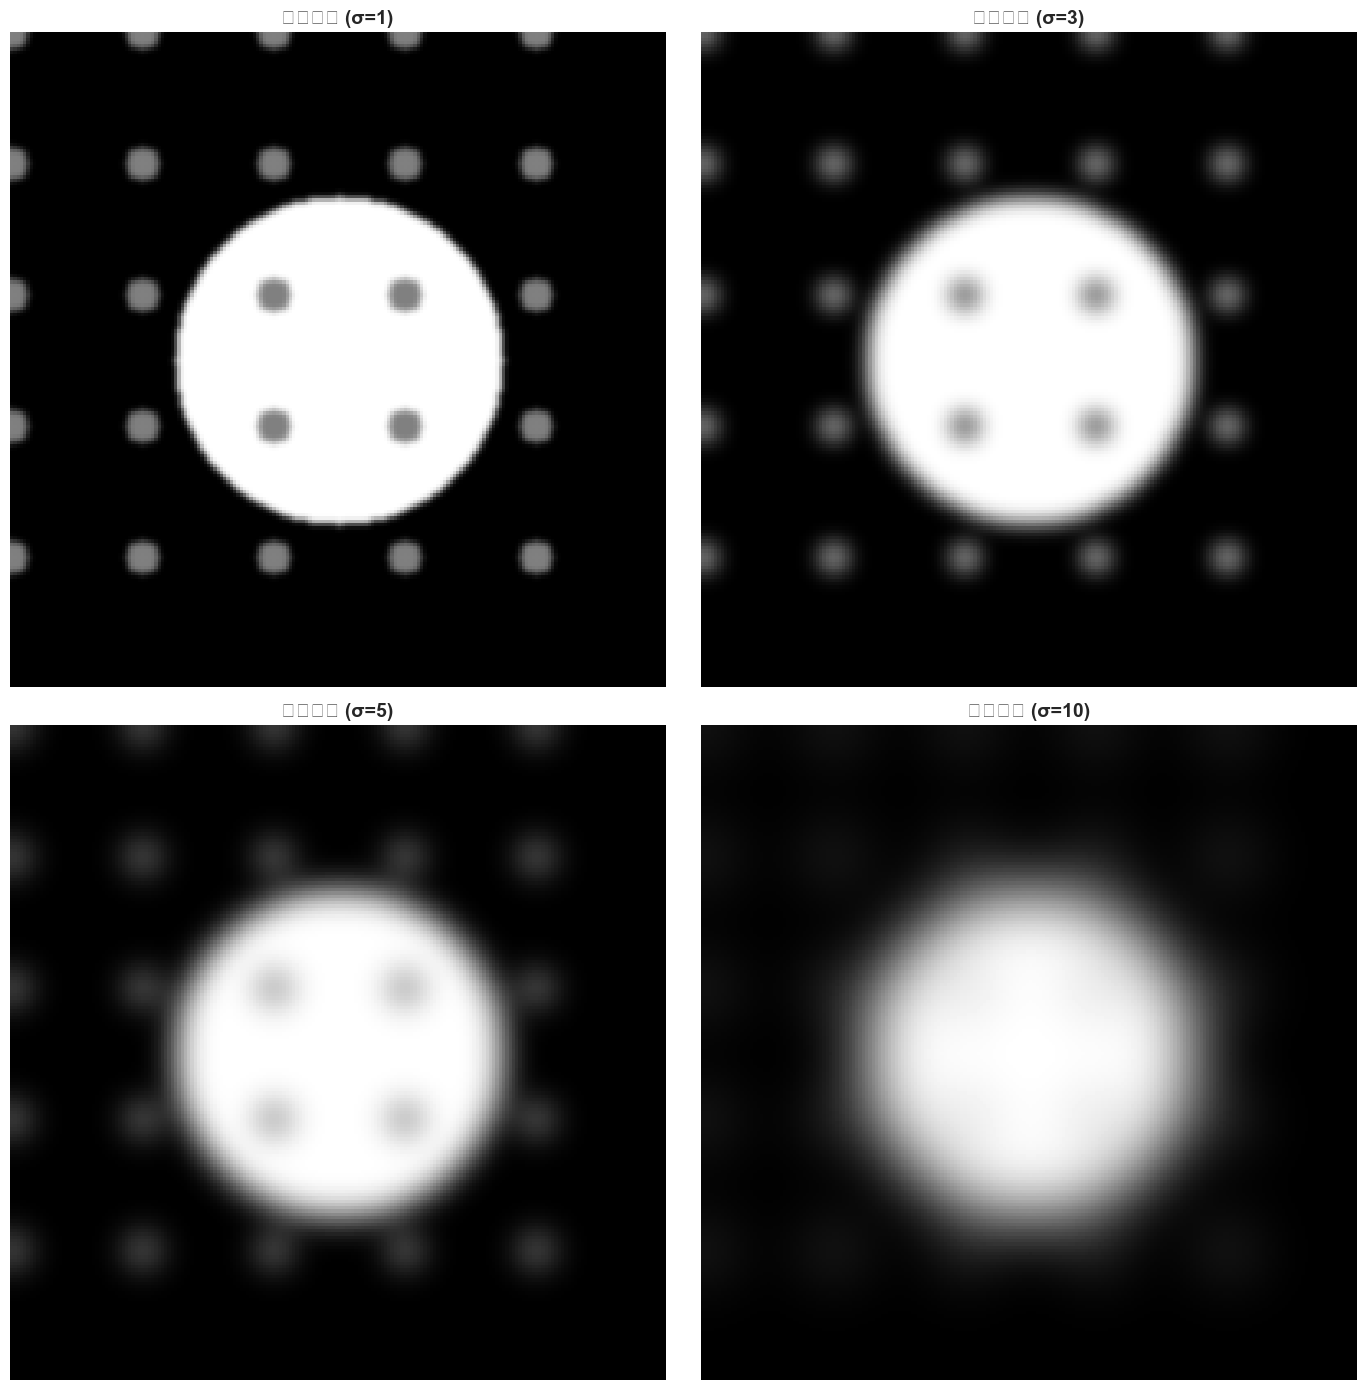

尺度空间可视化说明：
1. σ越小，图像越清晰，能看到小尺度特征（小圆）
2. σ越大，图像越模糊，只能看到大尺度特征（大圆）
3. 通过在不同尺度下分析图像，我们可以检测不同大小的特征


In [2]:
# ============================================
# 尺度空间可视化
# ============================================
# 这个示例展示了如何构建和可视化尺度空间

# 创建一个测试图像（包含不同尺度的特征）
test_image = np.zeros((200, 200))
# 添加大尺度特征（大圆）
cv2.circle(test_image, (100, 100), 50, 1, -1)
# 添加小尺度特征（小圆）
for i in range(0, 200, 40):
    for j in range(0, 200, 40):
        cv2.circle(test_image, (i, j), 5, 0.5, -1)

# 不同的尺度参数
sigma_values = [1, 3, 5, 10]

# 可视化
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

for idx, sigma in enumerate(sigma_values):
    row = idx // 2
    col = idx % 2
    
    # 构建高斯核
    size = int(6 * sigma + 1)
    if size % 2 == 0:
        size += 1
    gaussian_kernel = cv2.getGaussianKernel(size, sigma)
    gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
    
    # 对图像进行高斯卷积
    smoothed_image = cv2.filter2D(test_image, -1, gaussian_kernel_2d)
    
    # 显示结果
    axes[row, col].imshow(smoothed_image, cmap='gray')
    axes[row, col].set_title(f'尺度空间 (σ={sigma})', fontsize=14, fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("=" * 60)
print("尺度空间可视化说明：")
print("=" * 60)
print("1. σ越小，图像越清晰，能看到小尺度特征（小圆）")
print("2. σ越大，图像越模糊，只能看到大尺度特征（大圆）")
print("3. 通过在不同尺度下分析图像，我们可以检测不同大小的特征")
print("=" * 60)


### 1.3 高斯金字塔和DoG金字塔详解

#### 1.3.1 高斯金字塔的构建

**为什么需要高斯金字塔**：尺度空间是连续的，但在实际计算中，我们需要离散化。高斯金字塔是尺度空间的离散实现，通过多个层级（octave）和多个尺度（scale）来表示不同尺度的图像。

**高斯金字塔的构建过程**：

1. **第一层级（Octave 0）**：
   - 从原始图像开始
   - 使用不同的 $\sigma$ 值进行高斯卷积，得到多个尺度的图像
   - 通常使用 $\sigma_0, k\sigma_0, k^2\sigma_0, \ldots$，其中 $k = 2^{1/s}$，$s$ 是每个层级的尺度数

2. **下一层级（Octave 1）**：
   - 对第一层级的某个尺度图像进行2倍下采样
   - 重复高斯卷积过程，得到多个尺度的图像

3. **重复上述过程**：构建多个层级的金字塔

**数学表示**：

假设原始图像的尺度为 $\sigma_0$，第 $o$ 个层级、第 $s$ 个尺度的图像为：

$$L_{o,s}(x, y) = G(x, y, \sigma_{o,s}) * I_o(x, y)$$

其中：
- $\sigma_{o,s} = \sigma_0 \cdot 2^o \cdot k^s$
- $I_o(x, y)$ 是第 $o$ 个层级的输入图像（经过下采样）

#### 1.3.2 DoG金字塔的构建

**为什么使用DoG**：DoG（Difference of Gaussians）可以近似拉普拉斯算子（LoG），而LoG的极值点对应图像中的关键点。使用DoG比直接计算LoG更高效。

**DoG的数学表示**：

$$D_{o,s}(x, y) = L_{o,s+1}(x, y) - L_{o,s}(x, y)$$

**DoG与LoG的关系**：

拉普拉斯算子（LoG）定义为：

$$\nabla^2 G = \frac{\partial^2 G}{\partial x^2} + \frac{\partial^2 G}{\partial y^2}$$

可以证明，DoG可以近似LoG：

$$D(x, y, \sigma) \approx (k-1)\sigma^2 \nabla^2 G * I(x, y)$$

**关键点检测**：在DoG金字塔中，我们检测局部极值点。一个点被认为是关键点，如果它在当前尺度及其相邻尺度（上下各一个尺度）和相邻空间位置（3x3邻域）中都是极值点。

#### 1.3.3 DoG金字塔的可视化

下面我们通过代码可视化DoG金字塔的构建过程：


C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 26031 (\N{CJK UNIFIED IDEOGRAPH-65AF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 32477 (\N{CJK UNIFIED IDEOGRAPH-7EDD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Upsin\AppData\Local\Temp\ipykernel_30636\3143132674.py:57: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9})

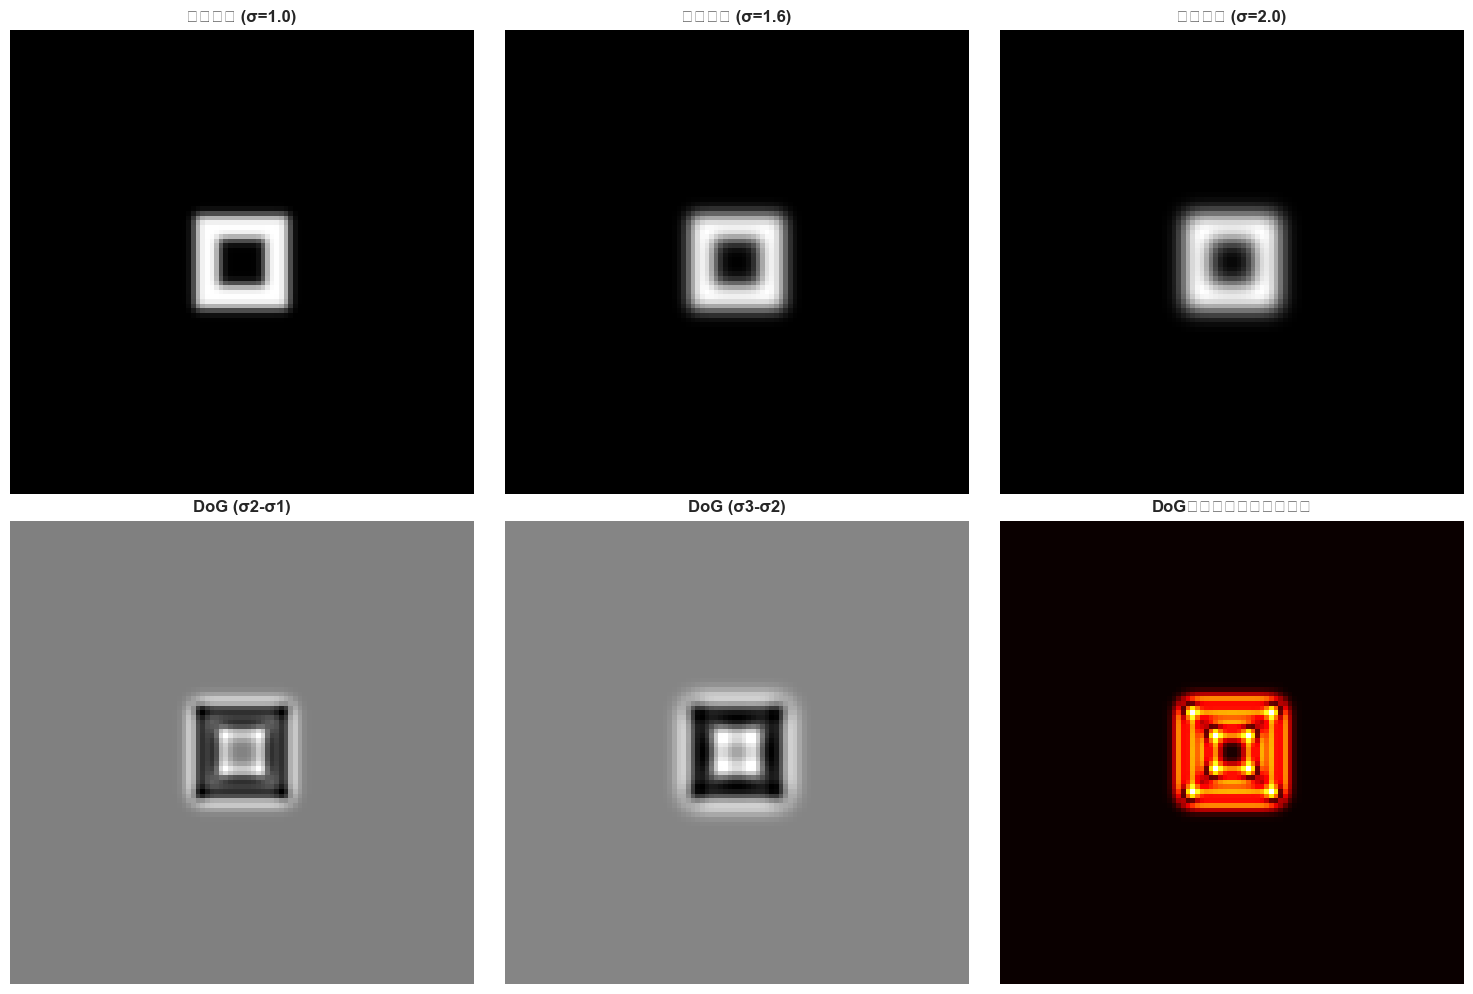

DoG金字塔可视化说明：
1. DoG通过计算相邻尺度的高斯图像之差得到
2. DoG的极值点对应图像中的关键点（如角点、边缘点）
3. 通过在不同尺度下计算DoG，我们可以检测不同尺度的关键点


In [3]:
# ============================================
# DoG金字塔可视化
# ============================================
# 这个示例展示了如何构建和可视化DoG金字塔

# 创建一个测试图像（包含角点特征）
test_image = np.zeros((100, 100))
# 添加角点
test_image[40:60, 40:60] = 1
test_image[45:55, 45:55] = 0

# 构建高斯金字塔（简化版，只构建一个层级）
sigma1 = 1.0
sigma2 = 1.6
sigma3 = 2.0

# 高斯卷积
gaussian1 = cv2.GaussianBlur(test_image, (0, 0), sigma1)
gaussian2 = cv2.GaussianBlur(test_image, (0, 0), sigma2)
gaussian3 = cv2.GaussianBlur(test_image, (0, 0), sigma3)

# 计算DoG
dog1 = gaussian2 - gaussian1
dog2 = gaussian3 - gaussian2

# 可视化
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 第一行：高斯图像
axes[0, 0].imshow(gaussian1, cmap='gray')
axes[0, 0].set_title(f'高斯图像 (σ={sigma1})', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian2, cmap='gray')
axes[0, 1].set_title(f'高斯图像 (σ={sigma2})', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(gaussian3, cmap='gray')
axes[0, 2].set_title(f'高斯图像 (σ={sigma3})', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# 第二行：DoG图像
axes[1, 0].imshow(dog1, cmap='gray')
axes[1, 0].set_title('DoG (σ2-σ1)', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(dog2, cmap='gray')
axes[1, 1].set_title('DoG (σ3-σ2)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

# 在DoG中检测极值点（简化版）
# 这里只是可视化，实际的关键点检测更复杂
axes[1, 2].imshow(np.abs(dog1), cmap='hot')
axes[1, 2].set_title('DoG绝对值（极值点区域）', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("=" * 60)
print("DoG金字塔可视化说明：")
print("=" * 60)
print("1. DoG通过计算相邻尺度的高斯图像之差得到")
print("2. DoG的极值点对应图像中的关键点（如角点、边缘点）")
print("3. 通过在不同尺度下计算DoG，我们可以检测不同尺度的关键点")
print("=" * 60)


### 1.4 关键点精确定位详解

#### 1.4.1 为什么需要精确定位

DoG检测到的关键点位置可能不够精确，原因包括：

1. **亚像素位置**：关键点的真实位置可能位于像素之间，而不是整数像素位置
2. **低对比度**：对比度低的关键点对噪声敏感，不够稳定
3. **边缘响应**：位于边缘上的关键点不够稳定，容易被误检

因此，我们需要对关键点进行精确定位和筛选。

#### 1.4.2 亚像素定位的数学推导

**步骤1：理解泰勒展开**

泰勒展开是一种用多项式近似函数的方法。对于函数 $f(x)$，在点 $x_0$ 处的泰勒展开为：

$$f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{1}{2}f''(x_0)(x-x_0)^2 + \ldots$$

**步骤2：对DoG函数进行泰勒展开**

对于DoG函数 $D(x, y, \sigma)$，在关键点候选位置 $(x_0, y_0, \sigma_0)$ 处进行泰勒展开：

$$D(x, y, \sigma) = D(x_0, y_0, \sigma_0) + \frac{\partial D}{\partial x}\Delta x + \frac{\partial D}{\partial y}\Delta y + \frac{\partial D}{\partial \sigma}\Delta \sigma + \frac{1}{2}\left[\frac{\partial^2 D}{\partial x^2}(\Delta x)^2 + 2\frac{\partial^2 D}{\partial x \partial y}\Delta x \Delta y + \frac{\partial^2 D}{\partial y^2}(\Delta y)^2\right] + \ldots$$

其中 $\Delta x = x - x_0$，$\Delta y = y - y_0$，$\Delta \sigma = \sigma - \sigma_0$。

**步骤3：找到极值点**

对泰勒展开求导，令导数为0，得到极值点的精确位置：

$$\frac{\partial D}{\partial x} = 0, \quad \frac{\partial D}{\partial y} = 0, \quad \frac{\partial D}{\partial \sigma} = 0$$

通过求解这个方程组，我们可以找到极值点的精确位置（亚像素精度）。

**步骤4：低对比度去除**

如果极值点的对比度 $|D(x, y, \sigma)|$ 小于阈值（通常为0.03），则去除该关键点。

#### 1.4.3 边缘响应去除

**为什么需要去除边缘响应**：位于边缘上的关键点不够稳定，因为边缘只有一个方向的主曲率，而角点有两个方向的主曲率。

**Hessian矩阵**：Hessian矩阵用于描述函数的二阶导数信息。对于DoG函数，Hessian矩阵为：

$$H = \begin{bmatrix}
\frac{\partial^2 D}{\partial x^2} & \frac{\partial^2 D}{\partial x \partial y} \\
\frac{\partial^2 D}{\partial x \partial y} & \frac{\partial^2 D}{\partial y^2}
\end{bmatrix}$$

**主曲率比**：Hessian矩阵的特征值 $\lambda_1$ 和 $\lambda_2$ 对应主曲率。如果 $\lambda_1 \gg \lambda_2$ 或 $\lambda_2 \gg \lambda_1$，则关键点位于边缘上，需要去除。

**判断标准**：设 $r = \lambda_1 / \lambda_2$（假设 $\lambda_1 > \lambda_2$），如果 $r > r_{thresh}$（通常为10），则去除该关键点。

### 1.5 方向分配详解

#### 1.5.1 为什么需要方向分配

为了实现旋转不变性，我们需要为每个关键点分配一个主方向，然后相对于这个主方向提取特征描述符。这样，即使图像旋转，特征描述符也不会改变。

#### 1.5.2 方向分配的数学推导

**步骤1：梯度计算**

在关键点周围的邻域中，计算每个像素的梯度幅值和方向：

$$m(x, y) = \sqrt{(\frac{\partial L}{\partial x})^2 + (\frac{\partial L}{\partial y})^2}$$

$$\theta(x, y) = \arctan(\frac{\partial L}{\partial y} / \frac{\partial L}{\partial x})$$

其中 $L(x, y)$ 是关键点所在尺度的高斯图像。

**步骤2：方向直方图统计**

统计梯度方向的直方图，通常将方向分为36个区间（每10度一个区间）。使用高斯函数对梯度幅值进行加权，距离关键点越近的像素权重越大：

$$w(x, y) = m(x, y) \cdot G(x, y, 1.5\sigma)$$

其中 $\sigma$ 是关键点的尺度。

**步骤3：主方向确定**

找到直方图的峰值方向，作为关键点的主方向。如果存在多个峰值（通常要求峰值至少是主峰值的80%），则为关键点分配多个方向。

### 1.6 SIFT描述符生成详解

#### 1.6.1 描述符生成的基本流程

1. **邻域选择**：在关键点周围取16x16的邻域，相对于关键点的主方向进行旋转
2. **子区域划分**：将16x16的邻域划分为4x4的子区域，共16个子区域
3. **方向直方图统计**：在每个子区域中统计8个方向的梯度直方图
4. **特征向量生成**：将所有子区域的方向直方图连接成128维的特征向量
5. **特征归一化**：对特征向量进行归一化，提高鲁棒性

#### 1.6.2 描述符生成的数学表示

**步骤1：邻域旋转**

将16x16的邻域相对于主方向进行旋转，实现旋转不变性：

$$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$$

其中 $\theta$ 是主方向。

**步骤2：方向直方图统计**

在每个4x4的子区域中，统计8个方向的梯度直方图。使用高斯函数对梯度幅值进行加权：

$$w(x, y) = m(x, y) \cdot G(x, y, \sigma_{desc})$$

其中 $\sigma_{desc}$ 是描述符的尺度参数（通常为关键点尺度的1.5倍）。

**步骤3：特征向量生成**

将所有16个子区域的8个方向直方图连接，得到128维的特征向量：

$$f = [h_{1,1}, h_{1,2}, \ldots, h_{1,8}, h_{2,1}, \ldots, h_{16,8}]$$

**步骤4：特征归一化**

对特征向量进行L2归一化：

$$f_{norm} = \frac{f}{\|f\|_2}$$

然后进行截断（通常截断到0.2），并重新归一化，提高对光照变化的鲁棒性。

---

## 2. 总结

### 2.1 SIFT特征提取的核心思想

1. **多尺度分析**：通过尺度空间和DoG金字塔在不同尺度下检测关键点
2. **旋转不变性**：通过方向分配实现旋转不变性
3. **光照不变性**：通过特征归一化实现光照不变性
4. **稳定性**：通过精确定位和筛选提高关键点的稳定性

### 2.2 SIFT特征的优缺点

**优点**：
- 尺度不变性、旋转不变性、光照不变性
- 对噪声和遮挡具有较好的鲁棒性
- 特征描述符具有很好的区分性

**缺点**：
- 计算复杂度高
- 对图像模糊敏感
- 特征描述符维度较高（128维）

### 2.3 在VLA中的意义

虽然现代VLA模型不直接使用SIFT特征，但理解SIFT特征的原理有助于：

1. **理解特征提取的基本思想**：多尺度分析、方向分配、特征描述等
2. **理解深度学习方法的设计思想**：CNN的多尺度特征、ViT的位置编码等
3. **理解不变性的实现原理**：如何实现旋转不变性、尺度不变性等

---

**文档完成时间**：2025-01-27  
**文档版本**：v1.0  
**维护者**：AI助手

**下一步学习**：
- 第二部分：HOG特征提取的详细讲解
- 第三部分：其他传统特征提取方法（LBP、ORB、SURF等）
